# Clustering drills

Welcome, traveler, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [Pokémon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

In the example, we wanted to determine the **most physically diverse** [Pokémon](./assets/pokemon.csv) team there is. To do so, we clustered the Pokémon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The Pokémon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the Pokémon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualize these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar Pokémon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** Pokémon groups from which you can determine your Pokémon team similar to the method described in the example.

In [ ]:
# cluster your Pokémon here

In [ ]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)

In [ ]:
# determine your final Pokémon here

## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - Manhattan distance
    - Squared distance
    - 1/(Squared distance)

In [ ]:
# Assign dissimilarity to your Pokémon here

Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse Pokémon team** possible...or is it?

We have clustered our Pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **Pokémon type**?

Some of the chosen Pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the Pokémon into 6 groups according to similar:
    - weight
    - height
    - primary Pokémon type
    - secondary Pokémon type
- determine the most dissimilar Pokémon team from these clusters

But wait, these Pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 Pokémon types, and Pokémon can only have one type. Vectorizing a **grass**, **fire**, and **water** Pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [9]:
print(pokemon_data.columns)


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


c:\Users\becode\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: 'c' argument has 801 elements, which is inconsistent with 'x' and 'y' with size 781.

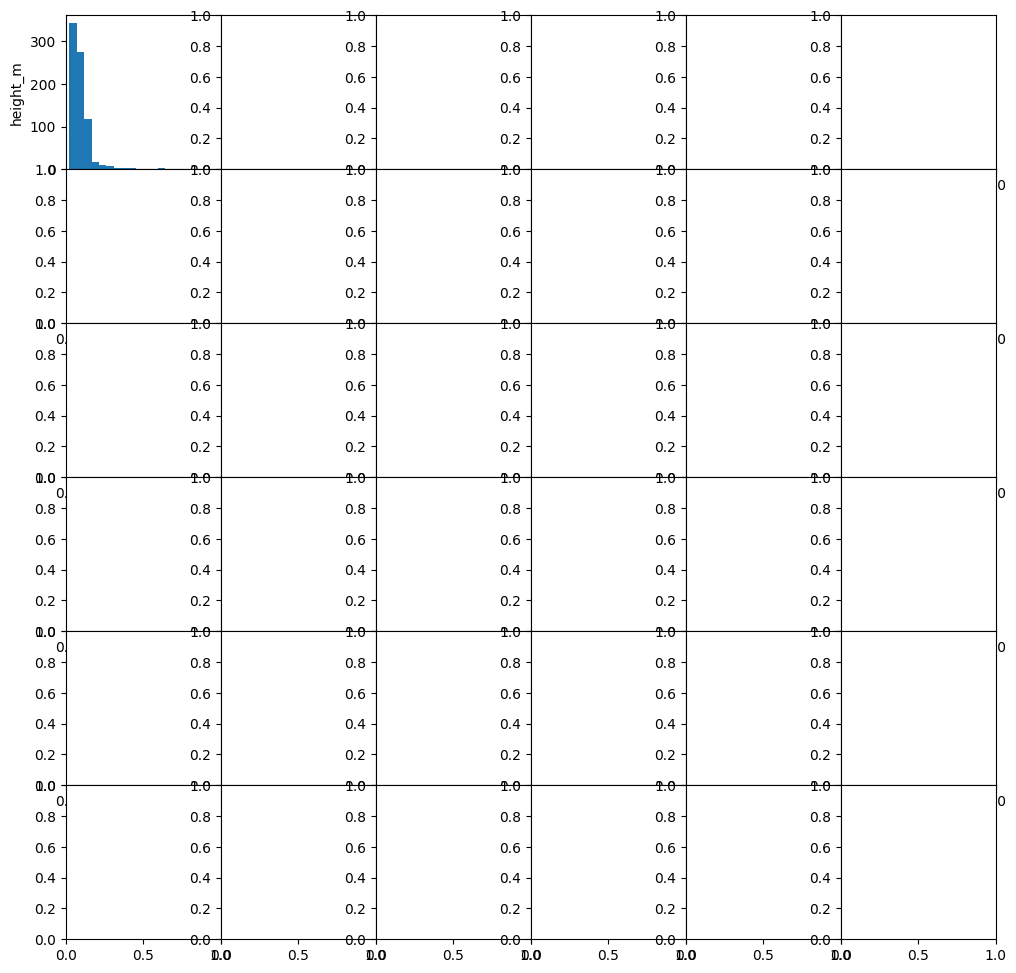

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the Pokémon dataset
pokemon_data = pd.read_csv("./assets/pokemon.csv")

# Choose features for clustering
features = ['height_m', 'weight_kg', 'hp', 'attack', 'defense', 'speed']
X = pokemon_data[features]

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
pokemon_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters with a scatter plot matrix
pd.plotting.scatter_matrix(X, c=pokemon_data['cluster'], figsize=(12, 12), marker='o', hist_kwds={'bins': 20})

# Determine the most dissimilar Pokémon team (one from each cluster)
diverse_team = pokemon_data.groupby('cluster').apply(lambda x: x.nlargest(1, 'Total')).reset_index(drop=True)

# Print the diverse Pokémon team
print("Most dissimilar Pokémon team:")
print(diverse_team[['Name', 'Total']])


In [ ]:
# vectorize your Pokémon type data here (there are modules that vectorize data)

In [ ]:
# cluster your multi-dimensional Pokémon data here

In [ ]:
# determine your unique team here

But wait, did you properly **normalize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example normalizes its data using the **z-score**. What does this mean? Z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

In the case of the Pokémon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the Euclidean distance between points of data would be larger.

For example, a Pokémon weighing 200kg and measuring 4m is about **as similar** as another Pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **Pokémon types** into vectors of length one, the **Euclidean distance** between one Pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **Pokémon type** matters more than **weight or height**?

In [ ]:
# normalize and scale your data in such a way that Pokémon type similarity matters more than the other metrics

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the Pokémon dataset
pokemon_data = pd.read_csvpokemon = pd.read_csv("./assets/pokemon.csv")

# Choose features for clustering: height, weight, hp, attack, defense, speed, and Pokémon types
features = ['height', 'weight', 'hp', 'attack', 'defense', 'speed', 'type1_encoded', 'type2_encoded']

# Extract selected features
X = pokemon_data[features]

# Apply Min-Max scaling to scale features within [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
pokemon_data['cluster'] = kmeans.fit_predict(X_scaled)

# Determine the most dissimilar Pokémon team (one from each cluster)
diverse_team = pokemon_data.groupby('cluster').apply(lambda x: x.nlargest(1, 'Total')).reset_index(drop=True)

# Print the diverse Pokémon team
print("Most dissimilar Pokémon team:")
print(diverse_team[['Name', 'Total']])



KeyError: "['height', 'weight', 'type1_encoded', 'type2_encoded'] not in index"

## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this exercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the Pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every Pokémon in a cluster to every other Pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximizing in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

In [ ]:
# compare your techniques here

###  clustering techniques on the Pokémon dataset based on weight and height
1. Choose three clustering techniques from scikit-learn.
2. luster the Pokémon dataset with each technique while adjusting the parameters to obtain 6 clusters.
3. Define similarity criteria (e.g., Euclidean distance) for comparing Pokémon within the same cluster.
4. Calculate in-cluster similarity for each cluster by comparing every Pokémon with every other Pokémon within the same cluster.
5. Calculate cluster-to-cluster similarity by comparing the centroids of each cluster (e.g., using Euclidean distance).
6. Repeat steps 3-5 for each clustering technique.
7. Compare in-cluster similarity and cluster-to-cluster similarity for each technique.
8. Visualize the results, including the progression of metrics for each iteration.

In [8]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pokémon dataset
pokemon_data = pd.read_csvpokemon = pd.read_csv("./assets/pokemon.csv")

# Choose features for clustering: weight and height
features = ['weight_kg', 'height_m']
X = pokemon_data[features]

# Standardize the data (standardization for K-means)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Initialize clustering techniques
kmeans = KMeans(n_clusters=6, random_state=0)
dbscan = DBSCAN(eps=0.5, min_samples=6)
agglo = AgglomerativeClustering(n_clusters=6)

clustering_techniques = [kmeans, dbscan, agglo]
technique_names = ['K-Means', 'DBSCAN', 'Agglomerative']

# Store results
results = {'Technique': [], 'In-Cluster Similarity': [], 'Cluster-to-Cluster Similarity': []}

# Perform clustering and evaluation for each technique
for i, technique in enumerate(clustering_techniques):
    labels = technique.fit_predict(X_standardized)

    # Calculate in-cluster similarity
    in_cluster_similarity = 0
    cluster_distances = pairwise_distances(X_standardized, metric='euclidean')
    for label in range(6):
        indices = labels == label
        if indices.any():
            in_cluster_similarity += cluster_distances[indices][:, indices].sum()

    # Calculate cluster-to-cluster similarity
    cluster_centroids = []
    for label in range(6):
        centroid = X_standardized[labels == label].mean(axis=0)
        cluster_centroids.append(centroid)

    cluster_to_cluster_similarity = 0
    for j in range(6):
        for k in range(j + 1, 6):
            cluster_to_cluster_similarity += pairwise_distances(
                [cluster_centroids[j]], [cluster_centroids[k]], metric='euclidean'
            )[0, 0]

    # Store results
    results['Technique'].append(technique_names[i])
    results['In-Cluster Similarity'].append(in_cluster_similarity)
    results['Cluster-to-Cluster Similarity'].append(cluster_to_cluster_similarity)

# Create a comparison plot
df_results = pd.DataFrame(results)
sns.barplot(x='Technique', y='In-Cluster Similarity', data=df_results)
plt.xlabel('Clustering Technique')
plt.ylabel('In-Cluster Similarity')
plt.title('Comparison of Clustering Techniques')
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values